In [681]:
# First try to use the data to train a model
import numpy as np
import random
import tensorflow as tf
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.client import device_lib
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras import regularizers
from keras.optimizers import SGD
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error
from keras.metrics import MeanAbsolutePercentageError
from tensorflow.keras.optimizers import Adam
import math
import csv

print(tf.config.experimental.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [682]:
# Load the dataset from the file
SensorValues = pd.read_csv('mySensorData.csv', header = None)
LocationValues = pd.read_csv('myLocationData.csv', header = None)
SortedValues = pd.read_csv('mySortedValues.csv', header = None)
SensorValues.head()
LocationValues.head()
SortedValues.head()

sensor_arr = SensorValues.values
location_arr = LocationValues.values
sorted_train = SortedValues.values

print(sensor_arr.shape)
print(location_arr.shape)
print(sorted_train.shape)

(3200, 192)
(3200, 3)
(960, 1)


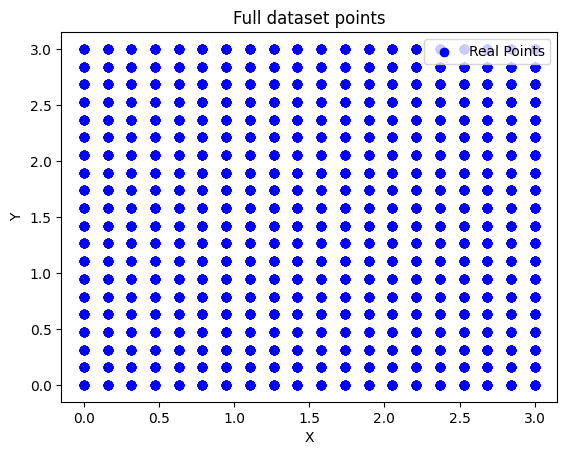

In [683]:
# Preview the Location of the real data points

plt.scatter(location_arr[:,0], location_arr[:,1], color='blue', label='Real Points')

# # Set the x-axis label to "X"
plt.xlabel('X')

# # Set the y-axis label to "Y"
plt.ylabel('Y')

# # Set the title of the plot to "Real vs Predicted Points"
plt.title('Full dataset points')

# # Add a legend to the plot
plt.legend()

# Show the plot
plt.show()
        


In [684]:
# Machine Learning - Prepare the data

X = sensor_arr
Y = location_arr

# print(X[0,:])
# print(Y)
scaler = MinMaxScaler()

X = scaler.fit_transform(X)


data_sen_size = int(X.shape[0])
data_sen_size2 = int(X.shape[1])

data_loc_size = int(Y.shape[0])
data_loc_size2 = int(Y.shape[1])

data_size_rotation = int(data_sen_size / 8)

size_train = 0.3

train_size = int(data_size_rotation * size_train)

# random_numbers = random.sample(range(0, data_size_rotation), train_size)

# train_numbers = np.zeros((train_size*8, 1))

# n_train_2 = 0
# for i in random_numbers:
#     for j in range(0, 8):
#         train_numbers[n_train_2] = i * 8 + j
#         n_train_2 = n_train_2 + 1

# sorted_train = np.sort(train_numbers, axis=0)


X_test = np.zeros((train_size * 8, data_sen_size2));
Y_test = np.zeros((train_size * 8, data_loc_size2));
X_train = np.zeros((data_sen_size - train_size * 8, data_sen_size2));
Y_train = np.zeros((data_sen_size - train_size * 8, data_loc_size2));

n_test = 0
n_train = 0

for i in range(data_sen_size):
    if i in sorted_train:
        X_test[n_test] = X[i, :]
        Y_test[n_test] = Y[i, :]
        n_test = n_test + 1
    else:
        X_train[n_train] = X[i, :]
        Y_train[n_train] = Y[i, :]
        n_train = n_train + 1

print(sorted_train)
# with open('mySortedValues.csv', 'w', newline='') as file:
#     writer = csv.writer(file)
#     for row in sorted_train:
#         writer.writerow(row)

[[  16.]
 [  17.]
 [  18.]
 [  19.]
 [  20.]
 [  21.]
 [  22.]
 [  23.]
 [  24.]
 [  25.]
 [  26.]
 [  27.]
 [  28.]
 [  29.]
 [  30.]
 [  31.]
 [  64.]
 [  65.]
 [  66.]
 [  67.]
 [  68.]
 [  69.]
 [  70.]
 [  71.]
 [ 128.]
 [ 129.]
 [ 130.]
 [ 131.]
 [ 132.]
 [ 133.]
 [ 134.]
 [ 135.]
 [ 152.]
 [ 153.]
 [ 154.]
 [ 155.]
 [ 156.]
 [ 157.]
 [ 158.]
 [ 159.]
 [ 200.]
 [ 201.]
 [ 202.]
 [ 203.]
 [ 204.]
 [ 205.]
 [ 206.]
 [ 207.]
 [ 208.]
 [ 209.]
 [ 210.]
 [ 211.]
 [ 212.]
 [ 213.]
 [ 214.]
 [ 215.]
 [ 248.]
 [ 249.]
 [ 250.]
 [ 251.]
 [ 252.]
 [ 253.]
 [ 254.]
 [ 255.]
 [ 272.]
 [ 273.]
 [ 274.]
 [ 275.]
 [ 276.]
 [ 277.]
 [ 278.]
 [ 279.]
 [ 280.]
 [ 281.]
 [ 282.]
 [ 283.]
 [ 284.]
 [ 285.]
 [ 286.]
 [ 287.]
 [ 320.]
 [ 321.]
 [ 322.]
 [ 323.]
 [ 324.]
 [ 325.]
 [ 326.]
 [ 327.]
 [ 360.]
 [ 361.]
 [ 362.]
 [ 363.]
 [ 364.]
 [ 365.]
 [ 366.]
 [ 367.]
 [ 368.]
 [ 369.]
 [ 370.]
 [ 371.]
 [ 372.]
 [ 373.]
 [ 374.]
 [ 375.]
 [ 376.]
 [ 377.]
 [ 378.]
 [ 379.]
 [ 380.]
 [ 381.]
 [ 382.]
 

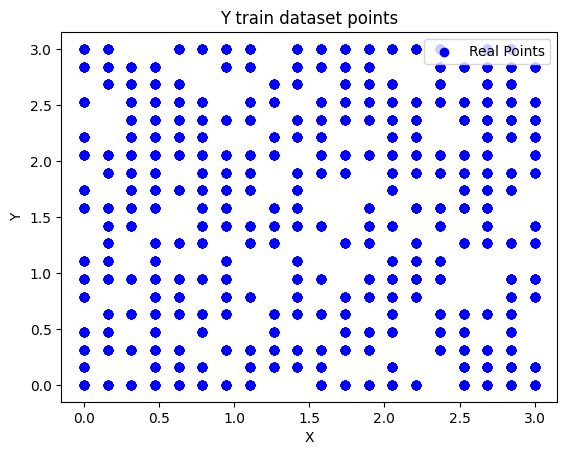

In [685]:

        
plt.scatter(Y_train[:,0], Y_train[:,1], color='blue', label='Real Points')

# # Set the x-axis label to "X"
plt.xlabel('X')

# # Set the y-axis label to "Y"
plt.ylabel('Y')

# # Set the title of the plot to "Real vs Predicted Points"
plt.title('Y train dataset points')

# # Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

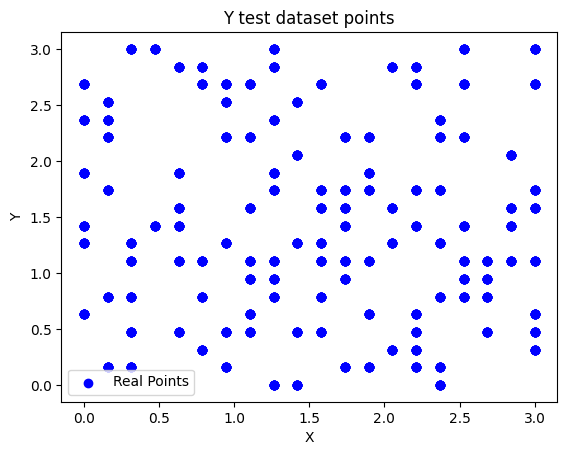

In [686]:
plt.scatter(Y_test[:,0], Y_test[:,1], color='blue', label='Real Points')

# # Set the x-axis label to "X"
plt.xlabel('X')

# # Set the y-axis label to "Y"
plt.ylabel('Y')

# # Set the title of the plot to "Real vs Predicted Points"
plt.title('Y test dataset points')

# # Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

In [687]:
# Machine Learning - Loss Functions for X and Y

def loss_function_xy(y_true, y_pred):
    xy_true = y_true[:, :2]
    xy_pred = y_pred[:, :2]
    return tf.reduce_mean(tf.square(xy_true - xy_pred))

In [688]:
# Machine Learning - Metric Functions for X and Y

def xy_metric (y_true, y_pred):
    xy_true = y_true[:, :2]
    xy_pred = y_pred[:, :2]
    return tf.reduce_mean(tf.sqrt(tf.reduce_sum(tf.square(xy_true - xy_pred), axis=1)))

In [689]:
# Machine Learning - Loss Functions for theta

def loss_function_theta(y_true, y_pred):
    theta_true = y_true
    theta_pred = y_pred
    return tf.reduce_mean(tf.square(theta_true - theta_pred))

In [690]:
# Machine Learning - Metric Functions for theta

def theta_metric (y_true, y_pred):
    theta_true = y_true
    theta_pred = y_pred
    return tf.reduce_mean(tf.abs(theta_true - theta_pred))

In [691]:
# Machine Learning - Build the model

inputs = tf.keras.Input(shape=(data_sen_size2,))

x = tf.keras.layers.Dense(192, activation='relu')(inputs)
# x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(12, activation='relu')(x)
x = tf.keras.layers.Dense(4, activation='relu')(x)
xy_output = tf.keras.layers.Dense(2, activation='linear', name='xy')(x)
theta_output = tf.keras.layers.Dense(1, activation='linear', name='theta')(x)

model = tf.keras.Model(inputs=inputs, outputs=[xy_output, theta_output])

model.summary()

optimizer = Adam(lr=0.001)
# model.compile(loss = 'SparseCategori', optimizer = 'adam', metrics = ['accuracy'])
model.compile(optimizer = optimizer, loss = {'xy': loss_function_xy, 'theta': loss_function_theta}, loss_weights={'xy': 0.99, 'theta': 0.01}, metrics = {'xy': xy_metric, 'theta': theta_metric})

Model: "model_47"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_49 (InputLayer)          [(None, 192)]        0           []                               
                                                                                                  
 dense_236 (Dense)              (None, 192)          37056       ['input_49[0][0]']               
                                                                                                  
 dense_237 (Dense)              (None, 64)           12352       ['dense_236[0][0]']              
                                                                                                  
 dense_238 (Dense)              (None, 12)           780         ['dense_237[0][0]']              
                                                                                           

c:\Users\win10\Github\Dissertation\.conda\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [692]:
# Machine Learning - Train the model
model.fit(X_train, {"xy": Y_train[:, :2], "theta": Y_train[:, 2]}, validation_data=(X_test, {"xy": Y_test[:, :2], "theta": Y_test[:, 2]}), epochs=2000, batch_size=160)

Epoch 1/2000
14/14 [==============================] - 1s 16ms/step - loss: 2.3082 - xy_loss: 2.2013 - theta_loss: 12.8903 - xy_xy_metric: 1.9071 - theta_theta_metric: 3.1024 - val_loss: 1.9699 - val_xy_loss: 1.8586 - val_theta_loss: 12.9899 - val_xy_xy_metric: 1.7345 - val_theta_theta_metric: 3.1196
Epoch 2/2000
14/14 [==============================] - 0s 8ms/step - loss: 1.8906 - xy_loss: 1.7781 - theta_loss: 13.0355 - xy_xy_metric: 1.6634 - theta_theta_metric: 3.1236 - val_loss: 1.8737 - val_xy_loss: 1.7616 - val_theta_loss: 12.9662 - val_xy_xy_metric: 1.6722 - val_theta_theta_metric: 3.1118
Epoch 3/2000
14/14 [==============================] - 0s 7ms/step - loss: 1.7872 - xy_loss: 1.6689 - theta_loss: 13.4989 - xy_xy_metric: 1.5953 - theta_theta_metric: 3.2021 - val_loss: 1.7301 - val_xy_loss: 1.6034 - val_theta_loss: 14.2687 - val_xy_xy_metric: 1.5738 - val_theta_theta_metric: 3.3217
Epoch 4/2000
14/14 [==============================] - 0s 7ms/step - loss: 1.5866 - xy_loss: 1.4222 

In [693]:
# Machine Learning - Evaluate the model

losses = model.evaluate(X_test, {'xy': Y_test[:, :2], 'theta': Y_test[:, 2]}, batch_size=32)
print("Mean Squared Error: ", losses)


30/30 [==============================] - 0s 2ms/step - loss: 0.0022 - xy_loss: 0.0019 - theta_loss: 0.0299 - xy_xy_metric: 0.0539 - theta_theta_metric: 0.1225
Mean Squared Error:  [0.0022229026071727276, 0.0019437378505244851, 0.029860176146030426, 0.053889453411102295, 0.12254929542541504]


30/30 [==============================] - 0s 862us/step
Mean Error for test data (distance):  0.2819266381003136 meters
Mean squared error for test data (degrees):  0.33677831332499075 degrees
#############################################################################################################
Mean Error for test data (distance):  tf.Tensor(0.3759561508478526, shape=(), dtype=float64) meters


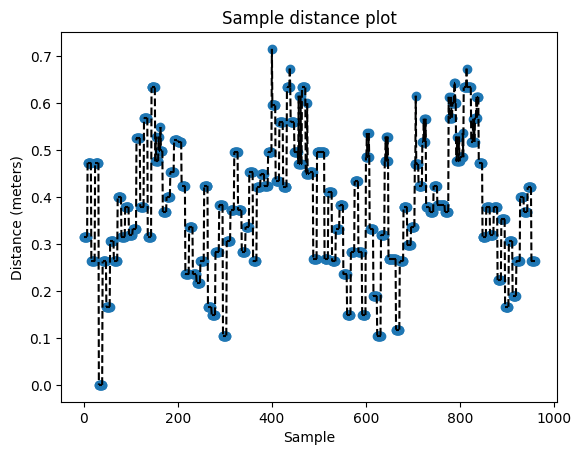

In [694]:
# Machine Learning - Make predictions

y_pred, theta_pred = model.predict(X_test)

y_pred_x = y_pred[:, 0]
y_pred_y = y_pred[:, 1]
y_pred_theta = theta_pred

# Round the predicted values to the nearest integer
y_pred_x = np.rint(y_pred_x.flatten())
y_pred_y = np.rint(y_pred_y.flatten())
y_pred_theta = np.rint(y_pred_theta.flatten())

# Combine the predicted x and y values into a single array of (x, y) tuples
y_pred = np.stack((y_pred_x, y_pred_y), axis=1)

# Calculate accuracy score
mse = metrics.mean_squared_error(Y_test[:, :2], y_pred)

print("Mean Error for test data (distance): ", math.sqrt(mse), "meters" )

mse = metrics.mean_squared_error(Y_test[:, 2], y_pred_theta)
print("Mean squared error for test data (degrees): ", math.sqrt(mse), "degrees" )

print("#############################################################################################################")

err = tf.reduce_mean(tf.sqrt(tf.square(Y_test[:, 0] - y_pred[:, 0]) + tf.square(Y_test[:, 1] - y_pred[:, 1])))
print("Mean Error for test data (distance): ", err, "meters")


distance = (tf.sqrt(tf.square(Y_test[:, 0] - y_pred[:, 0]) + tf.square(Y_test[:, 1] - y_pred[:, 1])))

fig, ax = plt.subplots()

ax.scatter(range(len(distance)), distance)

ax.set_xlabel('Sample')
ax.set_ylabel('Distance (meters)')
ax.set_title('Sample distance plot')


# Show lines between adjacent samples
for i in range(len(distance)-1):
    ax.plot([i, i+1], [distance[i], distance[i+1]], 'k--')

# Show the plot
plt.show()

30/30 [==============================] - 0s 862us/step


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


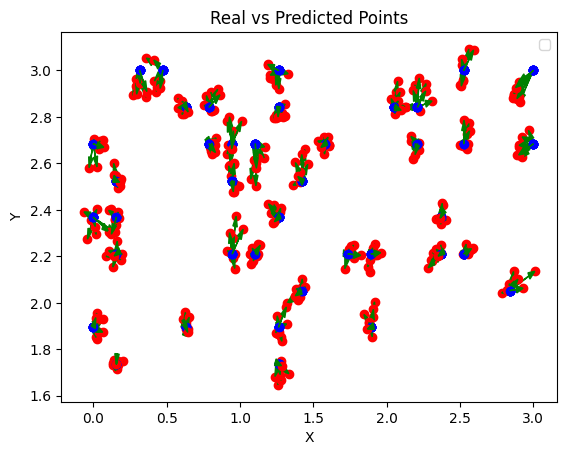

In [695]:

# Assume you have a trained model called "model"
# and a test set called X_test and y_test

# Make predictions on the test set
y_pred, theta_pred = model.predict(X_test)

# Create a scatter plot showing the real points in blue
# plt.scatter(Y_test[:,0], Y_test[:,1], color='blue', label='Real Points')

x_pred = y_pred[:, 0]
y_pred = y_pred[:, 1]

# Create a scatter plot showing the predicted points in red
# plt.scatter(x_pred, y_pred, color='red', label='Predicted Points')

# Loop through each point in the test set
for i in range(0 , 320):
    # Get the x and y coordinates for the real and predicted points
    x_real, y_real, theta_real = Y_test[i]
    x_pred_arrow = x_pred[i]
    y_pred_arrow = y_pred[i]
    plt.scatter(x_real, y_real, color='blue')
    plt.scatter(x_pred_arrow, y_pred_arrow, color='red')
    # Add an arrow from the real point to the predicted point
    plt.arrow(x_real, y_real, x_pred_arrow - x_real, y_pred_arrow - y_real, 
              length_includes_head=True, head_width=0.03, color='green')
    
# Set the x-axis label to "X"
plt.xlabel('X')

# Set the y-axis label to "Y"
plt.ylabel('Y')

# Set the title of the plot to "Real vs Predicted Points"
plt.title('Real vs Predicted Points')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()